In [1]:
import sys
print(sys.version)
print(sys.path[2])

3.10.4 (main, Mar 31 2022, 03:38:35) [Clang 12.0.0 ]
/Users/ssv/opt/anaconda3/envs/ML_Test/lib/python3.10


In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import re

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import missingno as msno
from matplotlib import pyplot as plt
%matplotlib inline

# File and Data Field Descriptions

* train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
    - PassengerId - Уникальный идентификатор для каждого пассажира. Каждый идентификатор принимает форму gggg_pp, где gggg указывает группу, с которой путешествует пассажир, а pp — его номер в группе. Люди в группе часто являются членами семьи, но не всегда.
    - HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
    - CryoSleep - Указывает, решил ли пассажир быть помещенным в анабиоз на время рейса. Пассажиры, находящиеся в криосонном состоянии, находятся в своих каютах.
    - Cabin - Номер каюты, в которой находится пассажир. Принимает форму палуба/число/сторона, где сторона может быть либо P для левого борта, либо S для правого борта.
    -  - Планета, на которую будет высаживаться пассажир.
    - Age - The age of the passenger.
    - VIP - Оплатил ли пассажир специальное VIP-обслуживание во время рейса.
    - RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
    - Name - The first and last names of the passenger.
    - Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

* test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

* sample_submission.csv - A submission file in the correct format.
    - PassengerId - Id for each passenger in the test set.
    - Transported - The target. For each passenger, predict either True or False.

In [5]:
def get_variables_names (variables_list = []):

    variables_names = np.array(range (0, len(variables_list)), dtype=np.dtype(object))
    
    for i in range (0, len(variables_list)):

        variables_names[i] = [x for x in globals() if globals()[x] is variables_list[i]][0]
        
    return variables_names    

In [6]:
def missed_values_count(df_list, normalize=True, visualize=True):
    
    missedvalues_df = pd.DataFrame()
    df_number = 0
    
    variables_names = get_variables_names(df_list)
    
    for df in df_list:
        
        totalvalues_in_row = df.shape[0]
    
        print('Total values in ', variables_names[df_number], ': ', totalvalues_in_row)
        
        for col in df.columns:
            
            if normalize:                
                missedvalues_df.loc[df_number, col] =  round(100 - (df[col].describe()[0] * 100) / totalvalues_in_row, 2)
                message_text = 'Missed values (%):'
            else:
                missedvalues_df.loc[df_number, col] = totalvalues_in_row - df[col].describe()[0]
                message_text = 'Missed values (counts):'
            
        df_number += 1    
    

    new_index = pd.Index(data=['DataFrame_Name']).append(missedvalues_df.columns)
    missedvalues_df['DataFrame_Name'] = variables_names
    
    missedvalues_df=missedvalues_df[new_index]
    
    print(message_text)
    
    if visualize:
        i = 0
        try:
            for df in df_list:
                msno.matrix(df, color=(0.0, 0.0, 0.99))
                i += 1
        except NameError:
            print('!!!! ------------------------------------------')
            print('Library missingno not installed!!!')
            print('https://github.com/ResidentMario/missingno')
            print('pip install missingno')
            print('import missingno as msno')
                    
    return missedvalues_df

In [7]:
train_df = pd.read_csv('~/TestProj/ML/Spaceship_Titanic/Data/train.csv')
test_df = pd.read_csv('~/TestProj/ML/Spaceship_Titanic/Data/test.csv')

print ('Train: ', train_df.shape, 'Test: ', test_df.shape)

Train:  (8693, 14) Test:  (4277, 13)


Total values in  train_df :  8693
Total values in  test_df :  4277
Missed values (counts):


,DataFrame_Name,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,train_df,0.0,201.0,217.0,199.0,182.0,179.0,203.0,181.0,183.0,208.0,183.0,188.0,200.0,0.0
1,test_df,0.0,87.0,93.0,100.0,92.0,91.0,93.0,82.0,106.0,98.0,101.0,80.0,94.0,NaN


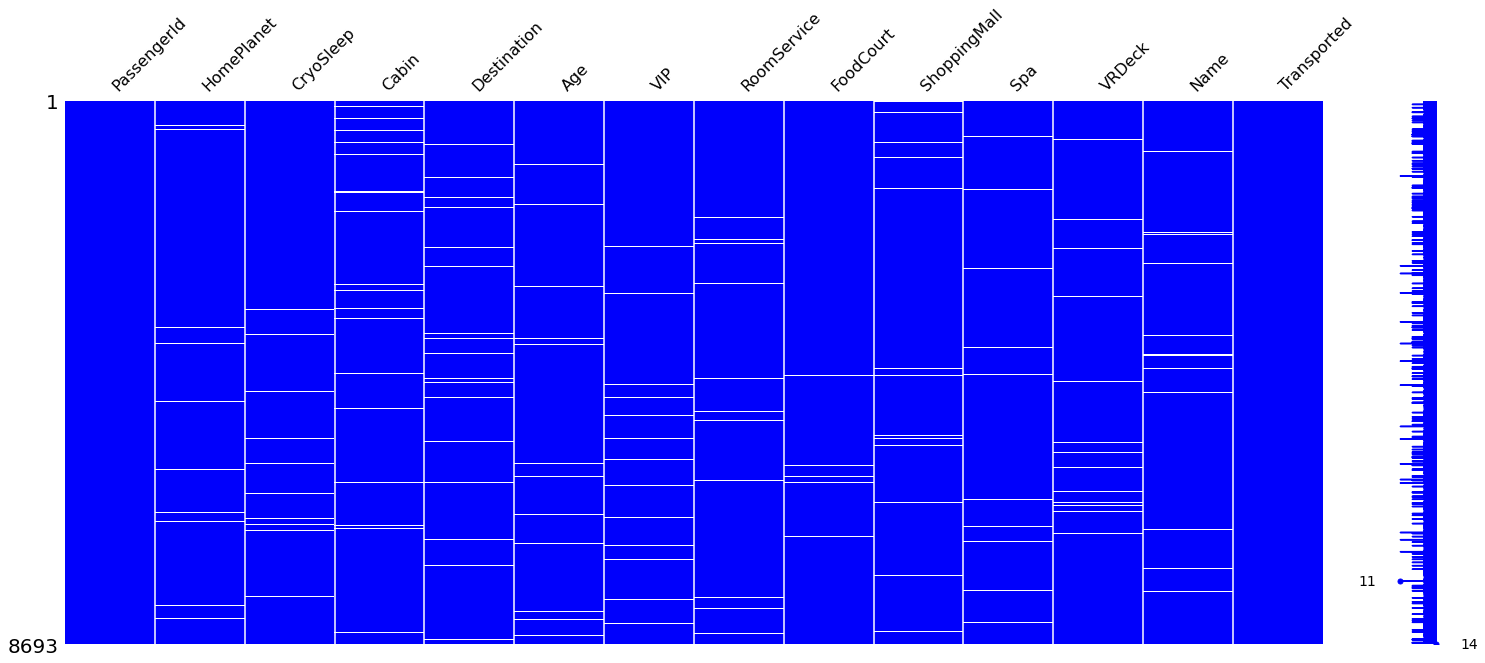

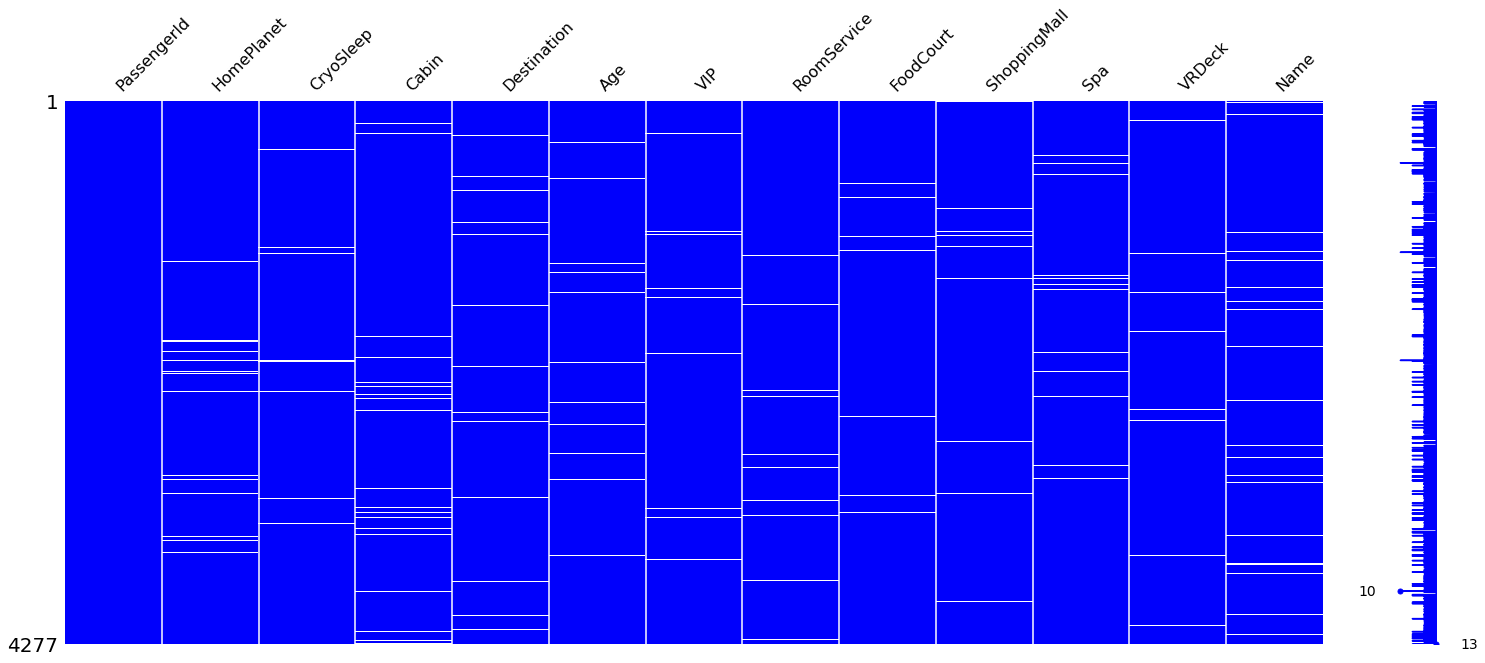

In [43]:
missed_values_count([train_df, test_df], normalize=False).head()

In [46]:
train_df[train_df['CryoSleep'] == True]['Age'].describe()

count    2955.000000
mean       27.405415
std        15.080469
min         0.000000
25%        18.000000
50%        26.000000
75%        37.000000
max        78.000000
Name: Age, dtype: float64

In [72]:
train_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
train_df.groupby(train_df['VIP'])['CryoSleep'].value_counts()

In [20]:
train_df.groupby(train_df['CryoSleep'])

In [ ]:
pd.crosstab(train_df['CryoSleep'], train_df['Transported'], normalize=True)

In [ ]:
train_df['Destination'].value_counts(normalize=True)

train_df.describe(include='object')

pd.crosstab(train_df['CryoSleep'], train_df['Transported'], normalize=False)

sss = train_df.style
sss.highlight_null(null_color='red', subset=None, props=None)

train_df.corr()

train_df.count()



train_df[train_df['CryoSleep'].isna()].style.highlight_null(null_color='red', subset=None, props=None)



plt.figure(figsize=(7, 3))
plt.hist(train_df['RoomService'], bins=50, color='#000099')

plt.xlabel ('RoomService')
plt.ylabel ('Hist')

plt.grid(lw=2)

train_df['RoomService']

train_df['RoomService'].describe()[0]

train_df.shape[0]

train_df.shape[0] - train_df['RoomService'].describe()[0]